# TensorFlow Keras API Project
Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off),is used to build a model that can predict whether or nor a borrower will pay back their loan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

the LendingClub DataSet is used from Kaggle     

https://www.kaggle.com/wordsforthewise/lending-club

In [2]:
# Data description
data_desc = pd.read_csv('lending_club_info.csv')
df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
data_desc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   LoanStatNew  28 non-null     object
 1   Description  28 non-null     object
dtypes: object(2)
memory usage: 576.0+ bytes


In [4]:
data_desc

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [5]:
# Program to extract Loanstats description
def feat_info(col_name):
    print(data_desc.loc[col_name]['Description'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### Exploratory Data Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

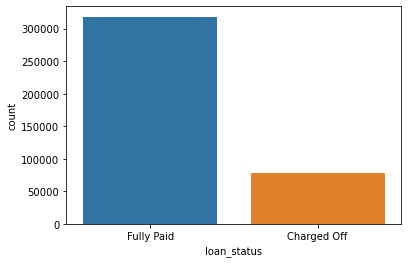

In [7]:
# Checking the diversity of the loan repayments
sns.countplot(x='loan_status',data=df)

C:\Users\balaj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 45000.0)

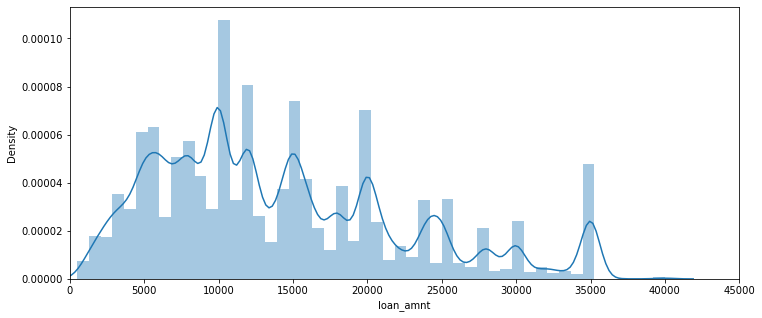

In [8]:
# Loan amount distribution histogram
plt.figure(figsize=(12,5))
sns.distplot(df['loan_amnt'], bins=50)
plt.xlim(0,45000)

### Checking for correlation between various features using heat map

In [9]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(10.0, 0.0)

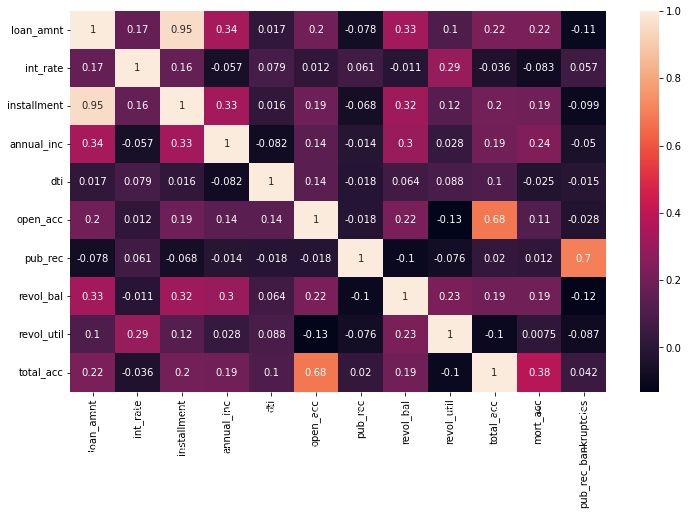

In [10]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=True)
plt.ylim(10, 0)

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

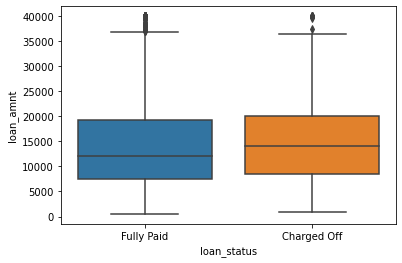

In [11]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

<AxesSubplot:xlabel='grade', ylabel='count'>

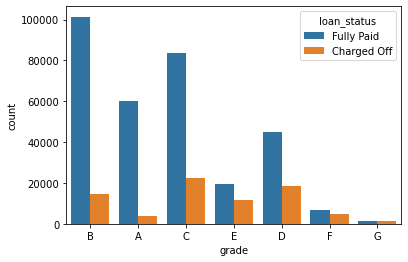

In [12]:
sns.countplot(x='grade',data=df,hue='loan_status')

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

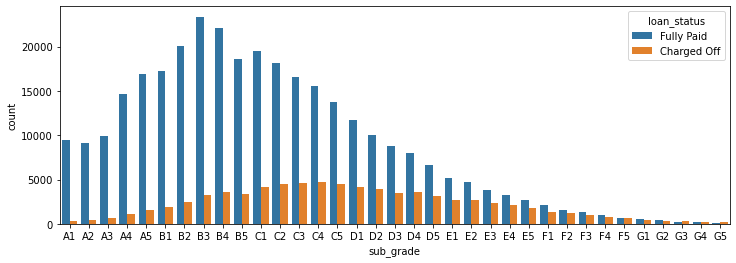

In [13]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,hue='loan_status')

In [14]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
# Creating a new column 'loan_repaid'
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

### Data Pre-processing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [17]:
# counting the missing data
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

#### Evaluating "emp_title" column

In [18]:
df['emp_title'].nunique()

173105

In [19]:
df['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

In [20]:
# too many unique values,Cannot be converted into dummy variable
df = df.drop('emp_title',axis=1)

#### Evaluating "emp_length" column

In [21]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [22]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

<AxesSubplot:xlabel='emp_length', ylabel='count'>

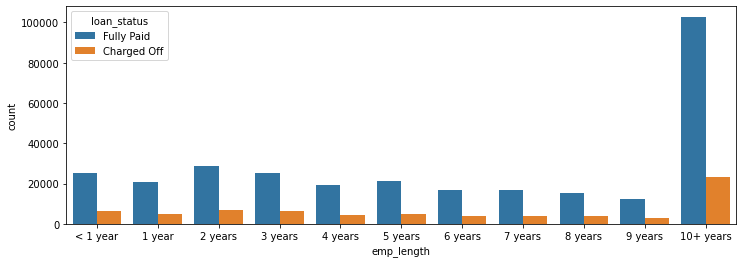

In [23]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length',data=df,order=emp_length_order,hue='loan_status')

In [24]:
# Checking for correlation between the emp_length and charged_off
emp_c_o = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_f_p = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']
emp_len = emp_c_o/emp_f_p

<AxesSubplot:xlabel='emp_length'>

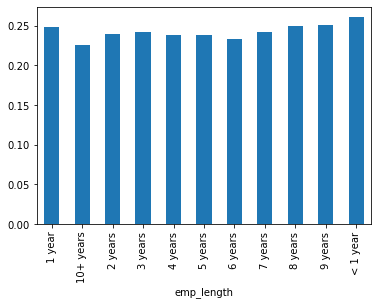

In [25]:
emp_len.plot(kind='bar')

In [26]:
#Charge off rates are extremely similar across all employment lengths
df = df.drop('emp_length',axis=1)

#### Evaluating "title" column

In [27]:
pd.DataFrame({'purpose':df['purpose'],'title':df['title']})

,purpose,title
0,vacation,Vacation
1,debt_consolidation,Debt consolidation
2,credit_card,Credit card refinancing
3,credit_card,Credit card refinancing
4,credit_card,Credit Card Refinance
...,...,...
396025,debt_consolidation,Debt consolidation
396026,debt_consolidation,Debt consolidation
396027,debt_consolidation,pay off credit cards
396028,debt_consolidation,Loanforpayoff


In [28]:
# Title is similar to purpose column
df = df.drop('title',axis=1)

In [29]:
df.isnull().sum()


loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [30]:
df['revol_util'].head(10)

0     41.8
1     53.3
2     92.2
3     21.5
4     69.8
5    100.6
6      4.9
7     64.5
8     32.9
9     82.4
Name: revol_util, dtype: float64

In [31]:
#checking for mort_acc correlation
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [32]:
# Note:- total_acc have correlation with mort_acc, the dataframe by 
#     the total_acc and calculate the mean value for the mort_acc per total_acc entry

df.groupby('total_acc').mean()['mort_acc']

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [33]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg[3.0] # testing

0.05202312138728324

In [34]:
# Function that fills the mort_acc values based on the total_acc values
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [35]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

#### Evaluating "revol_util" and "pub_rec_bankruptcies"

In [36]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_repaid
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",1
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",1
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",1
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0


In [37]:
# since the missing data rows account for less than 0.5% of total, it is removed
df = df.dropna()

### Addressing the Categorical variables

In [38]:
#checking object datatyped features
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [39]:
df['term'].value_counts() #binary column

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [40]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

grade is part of sub_grade, so just drop the grade feature

In [41]:
df = df.drop('grade',axis=1)

In [42]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

In [43]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [44]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [45]:
df[['verification_status','application_type','initial_list_status','purpose' ]].head(10)

,verification_status,application_type,initial_list_status,purpose
0,Not Verified,INDIVIDUAL,w,vacation
1,Not Verified,INDIVIDUAL,f,debt_consolidation
2,Source Verified,INDIVIDUAL,f,credit_card
3,Not Verified,INDIVIDUAL,f,credit_card
4,Verified,INDIVIDUAL,f,credit_card
5,Verified,INDIVIDUAL,f,debt_consolidation
6,Source Verified,INDIVIDUAL,f,home_improvement
7,Not Verified,INDIVIDUAL,f,credit_card
8,Verified,INDIVIDUAL,w,debt_consolidation
9,Verified,INDIVIDUAL,f,debt_consolidation


In [46]:
dummies = pd.get_dummies(df[['verification_status',
                             'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [47]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [48]:
#replacing none and any in other, to reduce he number of dummy columns
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [49]:
# Only using the zipcode of the address, last 5 characters
df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [50]:
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [51]:
#Only 10 catagories, so 10 dummy variables are created
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [52]:
# our trained model will not be able to use this feature, even before the loan in sactioned
df = df.drop('issue_d',axis=1)

In [53]:
# earliest_cr_year
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [54]:
df.head(10)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,...,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,...,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,...,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,...,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,...,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,...,0,1,0,0,0,0,0,0,0,1999
5,20000.0,36,13.33,677.07,86788.0,Fully Paid,16.31,8.0,0.0,25757.0,...,0,0,0,0,1,0,0,0,0,2005
6,18000.0,36,5.32,542.07,125000.0,Fully Paid,1.36,8.0,0.0,4178.0,...,0,0,1,0,0,0,0,0,0,2005
7,13000.0,36,11.14,426.47,46000.0,Fully Paid,26.87,11.0,0.0,13425.0,...,0,0,0,0,1,0,0,0,0,1994
8,18900.0,60,10.99,410.84,103000.0,Fully Paid,12.52,13.0,0.0,18637.0,...,0,0,1,0,0,0,0,0,0,1994
9,26300.0,36,16.29,928.40,115000.0,Fully Paid,23.69,13.0,0.0,22171.0,...,0,0,0,0,0,0,0,0,0,1997


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 80 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int64  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  object 
 6   dti                                  395219 non-null  float64
 7   open_acc                             395219 non-null  float64
 8   pub_rec                              395219 non-null  float64
 9   revol_bal                            395219 non-null  float64
 10  revol_util                           395219 non-null  float64
 11  total_acc    

In [56]:
df= df.drop('loan_status',axis=1)

### Train Test Data Split

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

### Normalizing the Data

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train = scaler.fit_transform(X_train)

In [82]:
X_test = scaler.transform(X_test)

### Creating a training model

In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [65]:
model = Sequential()
# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [66]:
model.fit(x=X_train, y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test),)

Epoch 1/25
1236/1236 [==============================] - 4s 3ms/step - loss: 0.2987 - val_loss: 0.2649
Epoch 2/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2653 - val_loss: 0.2627
Epoch 3/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2627 - val_loss: 0.2624
Epoch 4/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2616 - val_loss: 0.2621
Epoch 5/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2607 - val_loss: 0.2622
Epoch 6/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2601 - val_loss: 0.2618
Epoch 7/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2598 - val_loss: 0.2617
Epoch 8/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2594 - val_loss: 0.2615
Epoch 9/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.2591 - val_loss: 0.2615
Epoch 10/25
1236/1236 [==============================] - 3s 3ms/step - loss: 0.258

In [67]:
from tensorflow.keras.models import load_model

In [68]:
model.save('Bank_loan_default_prediction.h5')

### Performance Evaluation

In [69]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

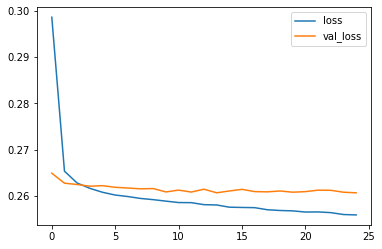

In [70]:
losses[['loss','val_loss']].plot()

In [85]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict(X_test)

2471/2471 [==============================] - 2s 686us/step


In [86]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt           25000.00
term                   60.00
int_rate               18.24
installment           638.11
annual_inc          61665.00
                      ...   
48052                   0.00
70466                   0.00
86630                   0.00
93700                   0.00
earliest_cr_year     1996.00
Name: 305323, Length: 78, dtype: float64

In [87]:
model.predict(new_customer.values.reshape(1,78))

1/1 [==============================] - 0s 16ms/step


array([[1.]], dtype=float32)